# Instalacao das Bibliotecas

In [ ]:
%pip install ydata_profiling

In [ ]:
%pip install -U scikit-learn

In [ ]:
%pip install lazypredict

In [ ]:
%pip install graphviz

# Analise e tratamento dos dados

In [ ]:
# Importar a função da biblioteca
from ydata_profiling import ProfileReport
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
# Configuração da quantidade de colunas para aparecer em um Datraframe
pd.set_option('display.max_columns', None)

In [ ]:
# Lendo o arquivo
path = r"/content/data.csv"
df = pd.read_csv(path, sep=";")

In [ ]:
# Analisando o arquivo
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
# executa a função que gera o relatório
profile = ProfileReport(df, title="alarmistica_churn")

# visualização do relatório no output
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#exportando o relatorio
profile.to_file("alarmistica_churn.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# backup do dataset
df_backup = df.copy()
df = df_backup.copy()

In [ ]:
# dropando as colunas desnecessarias
df.drop(columns=["Application order","Curricular units 1st sem (grade)","Curricular units 1st sem (credited)","Curricular units 1st sem (enrolled)","Curricular units 1st sem (evaluations)","Curricular units 1st sem (without evaluations)",
                 "Curricular units 2nd sem (grade)","Curricular units 2nd sem (credited)","Curricular units 2nd sem (enrolled)","Curricular units 2nd sem (evaluations)","Curricular units 2nd sem (without evaluations)", "Displaced", "GDP",
                 "Inflation rate", "International", "Previous qualification (grade)", "Unemployment rate", "Application order", "Application mode", "Previous qualification"], axis=0, inplace=True)

In [ ]:
df.head()

,Marital status,Course,Daytime/evening attendance\t,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (approved),Curricular units 2nd sem (approved),Target
0,1,171,1,1,19,12,5,9,127.3,0,0,1,1,0,20,0,0,Dropout
1,1,9254,1,1,1,3,3,3,142.5,0,0,0,1,0,19,6,6,Graduate
2,1,9070,1,1,37,37,9,9,124.8,0,0,0,1,0,19,0,0,Dropout
3,1,9773,1,1,38,37,5,3,119.6,0,0,1,0,0,20,6,5,Graduate
4,2,8014,0,1,37,38,9,9,141.5,0,0,1,0,0,45,5,6,Graduate


In [ ]:
# expurgando da coluna Target os dados "Enrolled"
filter = df["Target"]!="Enrolled"
df = df[filter]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 0 to 4423
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Marital status                       3630 non-null   int64  
 1   Course                               3630 non-null   int64  
 2   Daytime/evening attendance	          3630 non-null   int64  
 3   Nacionality                          3630 non-null   int64  
 4   Mother's qualification               3630 non-null   int64  
 5   Father's qualification               3630 non-null   int64  
 6   Mother's occupation                  3630 non-null   int64  
 7   Father's occupation                  3630 non-null   int64  
 8   Admission grade                      3630 non-null   float64
 9   Educational special needs            3630 non-null   int64  
 10  Debtor                               3630 non-null   int64  
 11  Tuition fees up to date       

In [ ]:
# traduzindo o dataframe
df.rename(columns={'Marital status':'EstadoCivil',
                   'Course':'Curso',
                   'Daytime/evening attendance\t':'Periodo',
                   'Nacionality': 'Nacionalidade',
                   "Mother's qualification": 'EscolaridadeMae',
                   "Father's qualification":'EscolaridadePai',
                   "Mother's occupation": 'ProfissaoMae',
                   "Father's occupation":'ProfissaoPai',
                   'Admission grade':'Notadeadmissao',
                   'Educational special needs':'Necessidadesespeciais',
                   'Debtor':'Devedor',
                   'Tuition fees up to date':'Mensalidadeemdia',
                   'Gender':'Genero',
                   'Scholarship holder':'Bolsista',
                   'Age at enrollment':'Idadenamatricula',
                   'Curricular units 1st sem (approved)':'Quantidadedemateriasaprovadas1sem',
                   'Curricular units 2nd sem (approved)':'Quantidadedemateriasaprovadas2sem'},inplace=True)

In [ ]:
# verificando as informacoes distintas do dataframe
for i in df:
  print(f"{i} {df[i].unique()}")

Estado Civil [1 2 4 3 5 6]
Curso [ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9147   33
 9119 9003 9556]
Periodo [1 0]
Nacionalidade [  1  62   6  41  26 103  13  25 101  11  22 100  24 109   2  21  14  17
 105]
Escolaridade Mae [19  1 37 38  3 42  2 34  4 12 40  9  5 39 11 41 30 14 35 36  6 10 29 18
 43 22 27 26 44]
Escolaridade Pai [12  3 37 38  1 19  4 34 39  2  5 11  9 36 26 40 14 20 35 41 22 13 29 43
 18 42 10  6 30 25 44 33 27 31]
Profissao Mae [  5   3   9   7   4   1 125   0   6   2  90   8 141  99 191 194 175 192
 132 143 123  10 193 151 134 144 171 153 152]
Profissao Pai [  9   3   7  10   5   4   8   1 124   6   0   2  90 175  99 144 195 192
 151 193 182 131 194 143 171 103 163 172 152 102 181 183 135 153 174 112
 122 141 114 101 154 123]
Nota de admissao [127.3 142.5 124.8 119.6 141.5 114.8 128.4 113.1 129.3 123.  130.6 119.3
 130.2 111.8 137.1 120.7 136.3 120.3 125.5 114.9 123.9 116.4 122.1 130.
 134.5 131.4 102.5 128.8 122.9 113.9 120.  121.1 120.4 100.6 1

In [ ]:
# Definindo as colunas categoricas
categorico_val = ['EstadoCivil','Curso','Periodo','Nacionalidade','EscolaridadeMae','EscolaridadePai','ProfissaoMae','ProfissaoPai','Necessidadesespeciais','Devedor','Mensalidadeemdia','Genero','Bolsista','Idadenamatricula','Target']

# Preparando os dados categóricos
categorico_val.remove('Target')
dataset = pd.get_dummies(df, columns = categorico_val)

# Cria objeto scaler
scaler = StandardScaler()

# Padronizando dados continuos
col_to_scale = ['Notadeadmissao', 'Quantidadedemateriasaprovadas1sem', 'Quantidadedemateriasaprovadas2sem']

# Adequando a base de dados para machine learning
dataset[col_to_scale] = scaler.fit_transform(dataset[col_to_scale])

In [ ]:
dataset.head()

,Notadeadmissao,Quantidadedemateriasaprovadas1sem,Quantidadedemateriasaprovadas2sem,Target,EstadoCivil_1,EstadoCivil_2,EstadoCivil_3,EstadoCivil_4,EstadoCivil_5,EstadoCivil_6,...,Idadenamatricula_53,Idadenamatricula_54,Idadenamatricula_55,Idadenamatricula_57,Idadenamatricula_58,Idadenamatricula_59,Idadenamatricula_60,Idadenamatricula_61,Idadenamatricula_62,Idadenamatricula_70
0,0.00,-1.48,-1.43,Dropout,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.04,0.37,0.47,Graduate,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.17,-1.48,-1.43,Dropout,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.53,0.37,0.15,Graduate,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.97,0.06,0.47,Graduate,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Lazy Predict

In [ ]:
# Abertura de bibliotecas
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# Separação da base em Treinamento e teste (70% treino / 30% teste)
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Target', axis=1),
                                                    dataset['Target'],
                                                    test_size=0.3)

In [ ]:
# Criando um objeto do pacote Lazy
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None)

In [ ]:
# Ajustando os dados de treinamento e teste
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:15<00:00,  1.88it/s]

[LightGBM] [Info] Number of positive: 1543, number of negative: 998
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 2541, number of used features: 98
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.607241 -> initscore=0.435731
[LightGBM] [Info] Start training from score 0.435731


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.89,0.88,None,0.89,0.33
RandomForestClassifier,0.89,0.87,None,0.89,0.86
AdaBoostClassifier,0.89,0.87,None,0.89,0.86
BaggingClassifier,0.88,0.86,None,0.87,0.45
CalibratedClassifierCV,0.88,0.86,None,0.87,4.95
RidgeClassifierCV,0.88,0.86,None,0.87,0.34
RidgeClassifier,0.88,0.86,None,0.87,0.17
LinearSVC,0.87,0.86,None,0.87,1.26
LinearDiscriminantAnalysis,0.87,0.85,None,0.87,0.33


In [ ]:
# exportando o dataframe em arquivo
dataset.to_csv("/content/base_churn_dummizada.csv", index=False)

# Fit modelo RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Função Classificação
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Resultado do treinamento:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Relatório de classificação:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Resultado do teste:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Relatório de classificação:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
# Fit do modelo
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Verificando a predicao
y_pred = rf.predict(X_test)
print(y_pred)

['Graduate' 'Dropout' 'Graduate' ... 'Graduate' 'Graduate' 'Dropout']


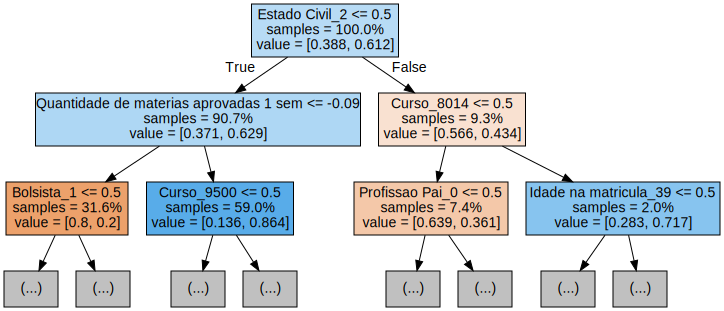

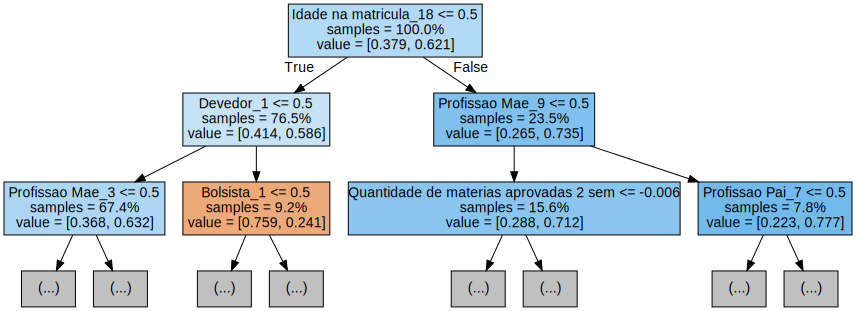

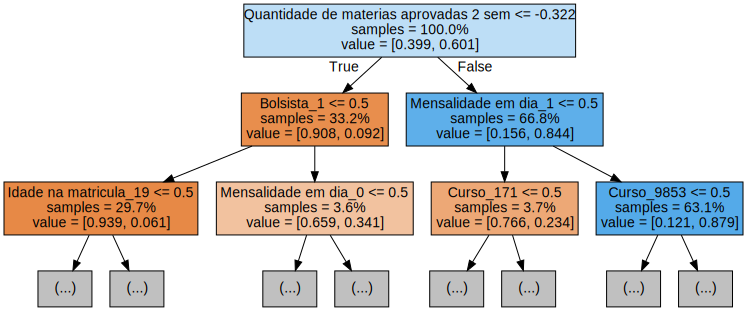

In [ ]:
# Visualizando as tres primeiras arvores de decisao da floresta
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
# Verificando as metricas do modelo
print_score(rf, X_train, y_train, X_test, y_test, train=True)
print_score(rf, X_train, y_train, X_test, y_test, train=False)

Resultado do treinamento:
Accuracy Score: 100.00%
_______________________________________________
Relatório de classificação:
           Dropout  Graduate  accuracy  macro avg  weighted avg
precision     1.00      1.00      1.00       1.00          1.00
recall        1.00      1.00      1.00       1.00          1.00
f1-score      1.00      1.00      1.00       1.00          1.00
support     998.00   1543.00      1.00    2541.00       2541.00
_______________________________________________
Confusion Matrix: 
 [[ 998    0]
 [   0 1543]]

Resultado do teste:
Accuracy Score: 88.61%
_______________________________________________
Relatório de classificação:
           Dropout  Graduate  accuracy  macro avg  weighted avg
precision     0.90      0.88      0.89       0.89          0.89
recall        0.79      0.94      0.89       0.87          0.89
f1-score      0.84      0.91      0.89       0.88          0.88
support     423.00    666.00      0.89    1089.00       1089.00
___________________

# Fit Modelo AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Fit no modelo
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)

In [ ]:
# Verificando a predicao
y_pred = clf.predict(X_test)
print(y_pred)

In [ ]:
# Verificando as metricas do modelo
print_score(clf, X_train, y_train, X_test, y_test, train=True)
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Resultado do treinamento:
Accuracy Score: 90.44%
_______________________________________________
Relatório de classificação:
           Dropout  Graduate  accuracy  macro avg  weighted avg
precision     0.91      0.90      0.90       0.90          0.90
recall        0.84      0.94      0.90       0.89          0.90
f1-score      0.87      0.92      0.90       0.90          0.90
support     998.00   1543.00      0.90    2541.00       2541.00
_______________________________________________
Confusion Matrix: 
 [[ 842  156]
 [  87 1456]]

Resultado do teste:
Accuracy Score: 88.89%
_______________________________________________
Relatório de classificação:
           Dropout  Graduate  accuracy  macro avg  weighted avg
precision     0.90      0.88      0.89       0.89          0.89
recall        0.81      0.94      0.89       0.87          0.89
f1-score      0.85      0.91      0.89       0.88          0.89
support     423.00    666.00      0.89    1089.00       1089.00
____________________

# Escolhendo o modelo e prevendo em lote

## Os dois modelos testados se mostraram eficientes e com metricas parecidas, optamos por prosseguir com o RandomForestClassifier

In [ ]:
from joblib import dump
from joblib import load

In [ ]:
# Salvando o modelo treinado
dump(rf, 'modelo_randomforest_churn.joblib')

# Carregando o modelo salvo
lr_rf = load("/content/modelo_randomforest_churn.joblib")

# Dados de entrada
dados_entrada = pd.read_csv("/content/base_churn_para_previsao.csv", sep=";")

# Obtendo a previsão
previsao = lr_rf.predict(dados_entrada)

# Imprimindo a previsão
print(previsao)

['Dropout' 'Dropout' 'Dropout' 'Graduate' 'Graduate' 'Dropout' 'Graduate'
 'Dropout' 'Graduate']
